# Stroke Data Analysis and Prediction
# 
## Overview
This project provides a detailed exploratory data analysis (EDA) of a healthcare dataset related to stroke prediction. The goal is to analyze the dataset, visualize patterns, process the data and then use the attributes to predict stroke using various machine learning algorithms.

## The Dataset
This dataset is sourced from kaggle and contains 12 columns and 5,110 records. It is structured to predict the likelihood of a stroke based on various health, lifestyle, and demographic attributes. Each row represents an individual, and the dataset includes both categorical and numerical features.

1]The id column uniquely identifies each individual in the dataset.

2]The gender column specifies the individual's gender, typically as "Male" or "Female."

3]The age column records the individual's age in years as a numerical value.

4]The hypertension column is a binary variable indicating whether the individual has a history of hypertension (0 for No, 1 for Yes).

5]The heart_disease column is a binary indicator for the presence of heart disease.

6]The ever_married column provides marital status, recorded as "Yes" or "No."

7]The work_type column describes the individual’s type of employment, such as "Private," "Self-employed," or others.

8]The Residence_type column categorizes the living area as either "Urban" or "Rural."

9]The avg_glucose_level column captures the average blood glucose level in mg/dL, a key health metric.

10]The bmi column records the body mass index (BMI), which may contain missing values.

11]The smoking_status column details the smoking habits of individuals, categorized as "never smoked," "formerly smoked," or "smokes."

12]The stroke column is the target variable, with 0 indicating no stroke and 1 indicating the occurrence of a stroke.

## Methodology
After loading the data the next steps were
Data Cleaning:
Handle missing values in the bmi column by replacing them with the column mean.
Drop the unnecessary id column.

Feature Categorization:
Divide features into categorical and discrete types based on unique values.
Encode categorical features using LabelEncoder.

Visualization:
Distribution plots for discrete features like age, avg_glucose_level, and bmi.
Count plots to show relationships between categorical features and the stroke target.
Pie charts for gender, hypertension, heart disease, and other attributes among stroke patients.

Statistical Analysis
The dataset was subjected to various statistical tests to identify the most significant features influencing the likelihood of a stroke. An ANOVA test was conducted on continuous variables to assess their relationship with the target variable, stroke.
Additionally, Chi-square tests were performed on categorical variables to examine their association with stroke this part of the code was lost and was done again at a later stag.

Implementing ML models
In the next step, various machine learning models were applied to the dataset to predict the likelihood of stroke. First, the data was preprocessed using different pipelines for numerical and categorical features. The numerical features were imputed using the median strategy, while the categorical features had missing values replaced with the most frequent category, followed by one-hot encoding.

The models tested included Linear Regression, Random Forest Regression, Gradient Boosting Regression, Support Vector Machine (SVM), and Naive Bayes. The models were evaluated based on mean squared error (MSE), mean absolute error (MAE), and R-squared score for regression tasks, and accuracy for classification tasks.

## Results
We got a good understanding about the distribution and the characteristics of the data through EDA.Then through statistical analysis we got that age was the most significant factor influencing stroke, with an ANOVA F-score of 326, followed by average glucose level(90), while BMI had a relatively low score(8). 

Chi-square tests further highlighted the significance of several categorical variables. Hypertension and heart disease had highly significant Chi-square statistics of 81.61 and 90.26, respectively, with p-values below 0.001, indicating strong associations with stroke. Similarly, ever married (Chi-square statistic: 58.92, p-value < 0.001), work type (Chi-square statistic: 49.16, p-value < 0.001), and smoking status (Chi-square statistic: 29.15, p-value < 0.001) were significant predictors. In contrast, gender and residence type showed no significant relationship with stroke, with p-values of 0.79 and 0.30, respectively. 

Machine learning model evaluations indicated that Support Vector Machine (SVM) was the most accurate, achieving a classification accuracy of 93.93%, followed by Naive Bayes with 86.50% accuracy. Among regression models, Gradient Boosting Regression demonstrated the best performance, with a mean squared error of 0.052, a mean absolute error of 0.091, and an R-squared score of 0.089, though it was outperformed by SVM in overall predictive accuracy. These results underscore the importance of both feature significance and model selection in accurately predicting stroke risk.

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [147]:
data = pd.read_csv(r"C:\Users\91963\Downloads\healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [148]:
data.shape

(5110, 12)

In [149]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


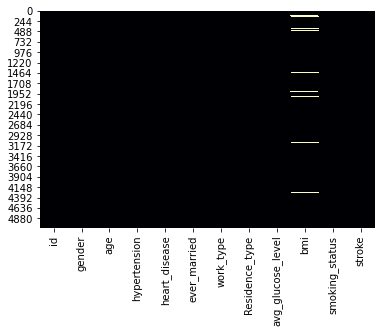

In [151]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [152]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


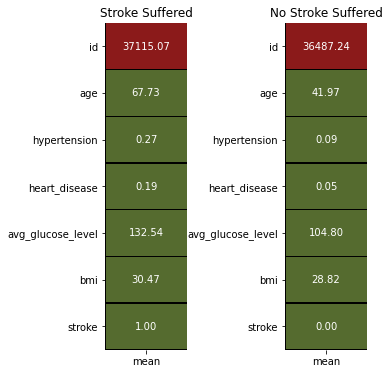

In [153]:
stroke = data[data['stroke'] == 1].describe().T
no_stroke = data[data['stroke'] == 0].describe().T

colors = ['#556B2F','#8B1A1A']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)

In [154]:
l1 = [i for i in tqdm(range(len(data.isnull()['bmi']))) if data.isnull().loc[i,'bmi'] == True]
print('Total Number of Missing Values in bmi feature :', len(l1))

100%|████████████████████████████████████████████████████████████████████████████| 5110/5110 [00:04<00:00, 1069.39it/s]

Total Number of Missing Values in bmi feature : 201


In [155]:
data['bmi'].fillna(data['bmi'].mean(),inplace = True)

In [156]:
data.drop(columns = ['id'],inplace = True)
col = list(data.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(data[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features are',*categorical_features)
print('Discrete Features are',*discrete_features)

data['age'] = data['age'].astype(int)
df1 = data.copy(deep = True)

Categorical Features are gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features are age avg_glucose_level bmi


In [157]:
le = LabelEncoder()
text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    df1[i] = le.fit_transform(df1[i])
    l3.append(list(df1[i].unique())); l4.append(list(le.inverse_transform(df1[i].unique())))
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 194.22it/s]

Label Encoder Transformation
gender  :  [1 0 2]  =  ['Male' 'Female' 'Other']
ever_married  :  [1 0]  =  ['Yes' 'No']
work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  :  [1 0]  =  ['Urban' 'Rural']
smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


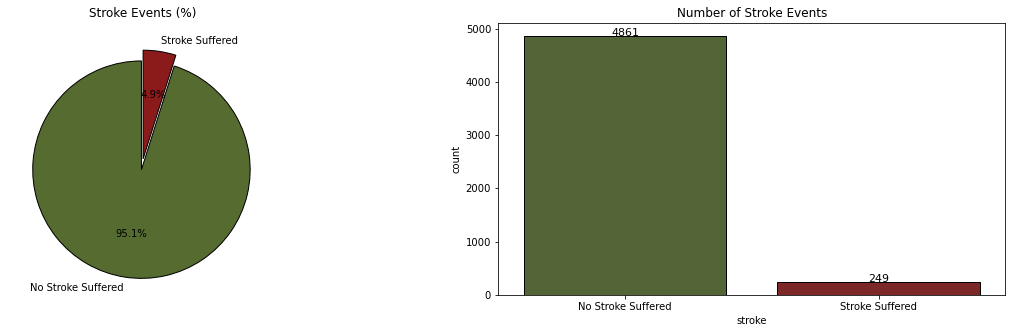

In [158]:
l = list(df1['stroke'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Stroke Suffered','Stroke Suffered'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Stroke Events (%)');

plt.subplot(1,2,2)
ax = sns.countplot('stroke',data = df1, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Stroke Suffered','Stroke Suffered'])
plt.title('Number of Stroke Events');
plt.show()

In [159]:
tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_data_features[i]][j] = k

tf1['hypertension'] = {0 : 'No Hypertension', 1 : 'Hypertension'} 
tf1['heart_disease'] = {0 : 'No Heart Disease', 1 : 'Heart Disease'}
tf1

{'gender': {1: 'Male', 0: 'Female', 2: 'Other'},
 'ever_married': {1: 'Yes', 0: 'No'},
 'work_type': {2: 'Private',
  3: 'Self-employed',
  0: 'Govt_job',
  4: 'children',
  1: 'Never_worked'},
 'Residence_type': {1: 'Urban', 0: 'Rural'},
 'smoking_status': {1: 'formerly smoked',
  2: 'never smoked',
  3: 'smokes',
  0: 'Unknown'},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

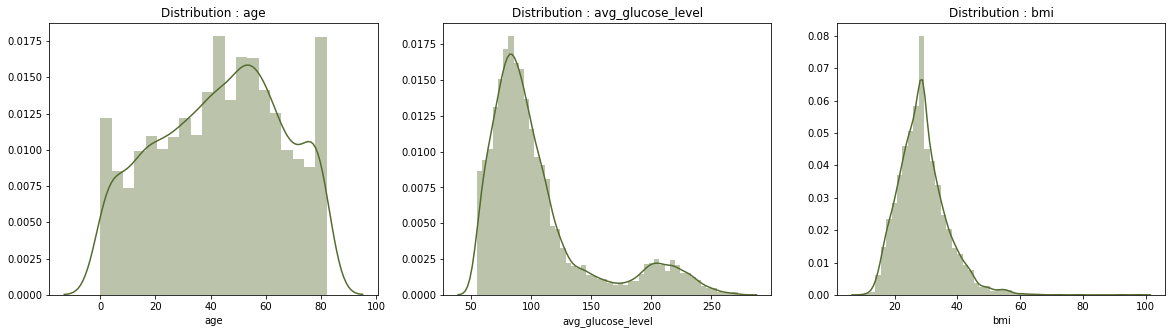

In [160]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[discrete_features[i]],color = colors[0])
    title = 'Distribution : ' + discrete_features[i]
    plt.title(title)
plt.show()

In [161]:
df1['age_group'] = [ int(i / 5) for i in df1['age']]
df1['avg_glucose_level_group'] = [ int(i / 20) for i in df1['avg_glucose_level']]
df1['bmi_group'] = [ int(i / 5) for i in df1['bmi']]

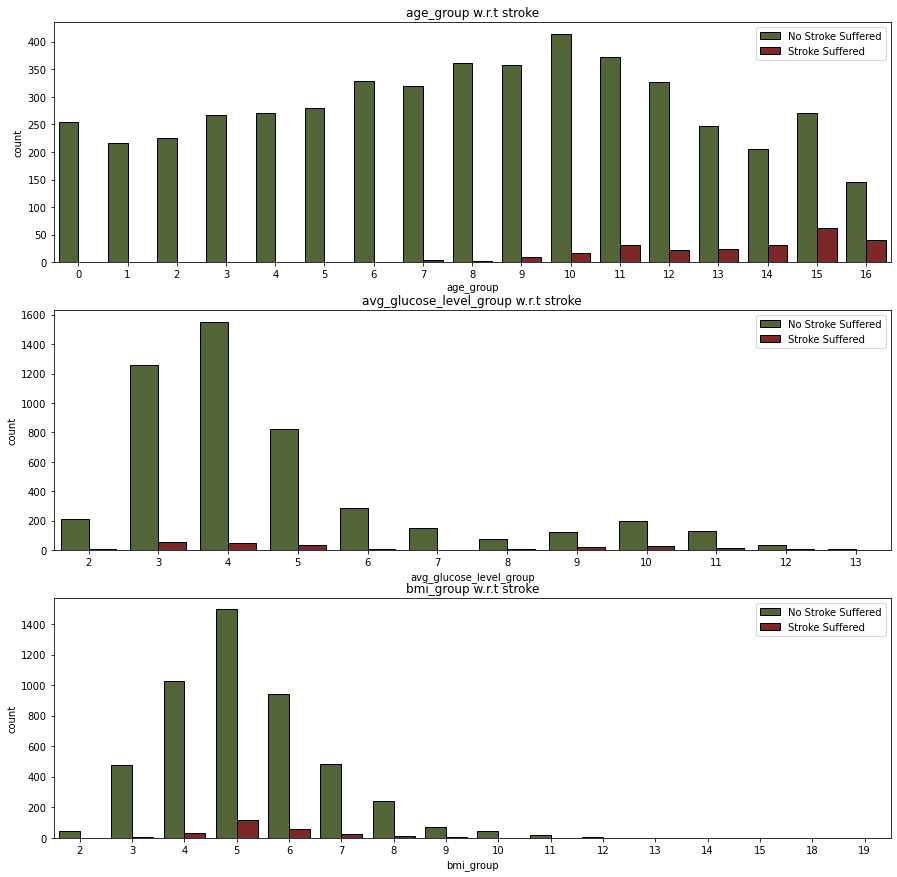

In [162]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
group_numerical_features = [i + '_group' for i in ['age','avg_glucose_level','bmi']]

for i in range(len(group_numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(group_numerical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'] ,loc = 'upper right')
    title = group_numerical_features[i] + ' w.r.t stroke'
    plt.title(title)

In [163]:
categorical_features.remove('stroke')

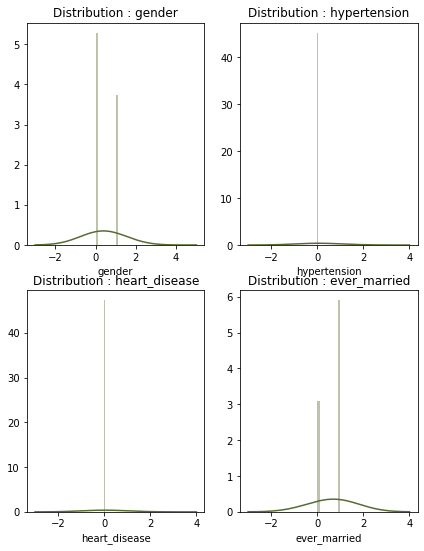

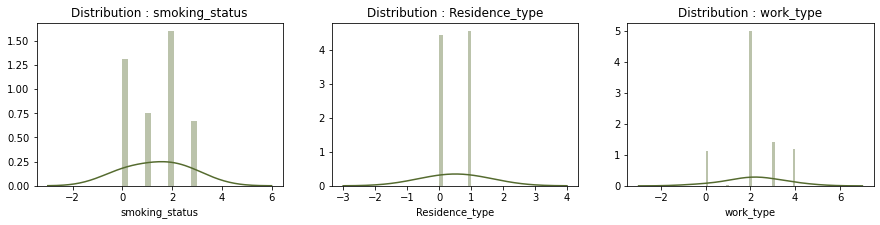

In [164]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (7,9))
for i in range(len(categorical_features[:4])):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

posx and posy should be finite values
posx and posy should be finite values


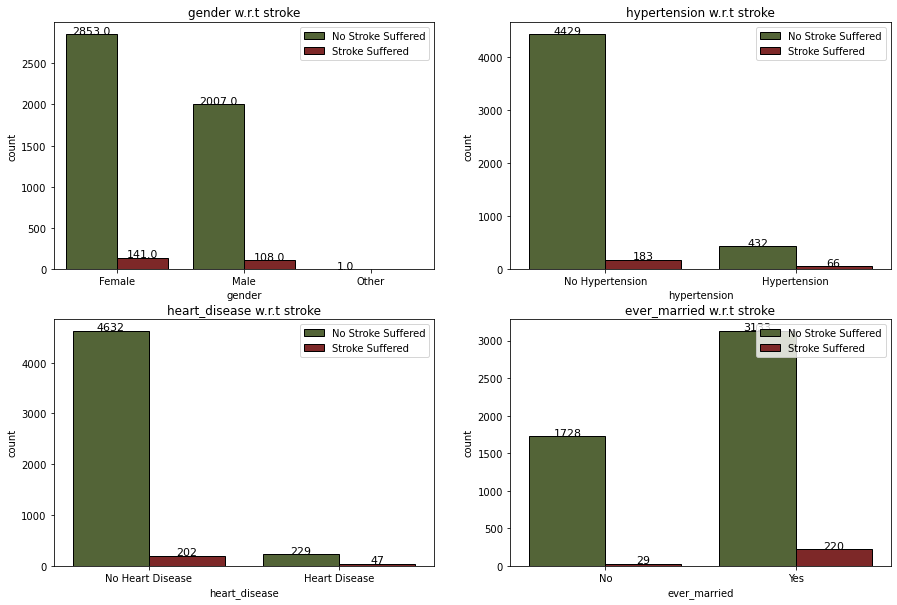

posx and posy should be finite values
posx and posy should be finite values


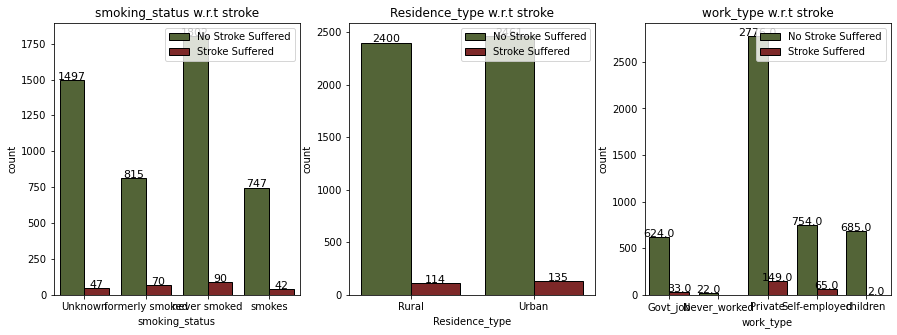

In [165]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

In [166]:
gender = df1[df1['stroke'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

hypertension = df1[df1['stroke'] == 1]['hypertension'].value_counts()
hypertension = [hypertension[0] / sum(hypertension) * 100, hypertension[1] / sum(hypertension) * 100]

heart_disease = df1[df1['stroke'] == 1]['heart_disease'].value_counts()
heart_disease = [heart_disease[0] / sum(heart_disease) * 100, heart_disease[1] / sum(heart_disease) * 100]

ever_married = df1[df1['stroke'] == 1]['ever_married'].value_counts()
ever_married = [ever_married[0] / sum(ever_married) * 100, ever_married[1] / sum(ever_married) * 100]
work_type = df1[df1['stroke'] == 1]['work_type'].value_counts()
work_type = [work_type[0] / sum(work_type) * 100, work_type[2] / sum(work_type) * 100,
             work_type[3] / sum(work_type) * 100, work_type[4] / sum(work_type) * 100,]

Residence_type = df1[df1['stroke'] == 1]['Residence_type'].value_counts()
Residence_type = [Residence_type[0] / sum(Residence_type) * 100, Residence_type[1] / sum(Residence_type) * 100]

smoking_status = df1[df1['stroke'] == 1]['smoking_status'].value_counts()
smoking_status = [smoking_status[0] / sum(smoking_status) * 100, smoking_status[1] / sum(smoking_status) * 100,
                  smoking_status[2] / sum(smoking_status) * 100, smoking_status[3] / sum(smoking_status) * 100]

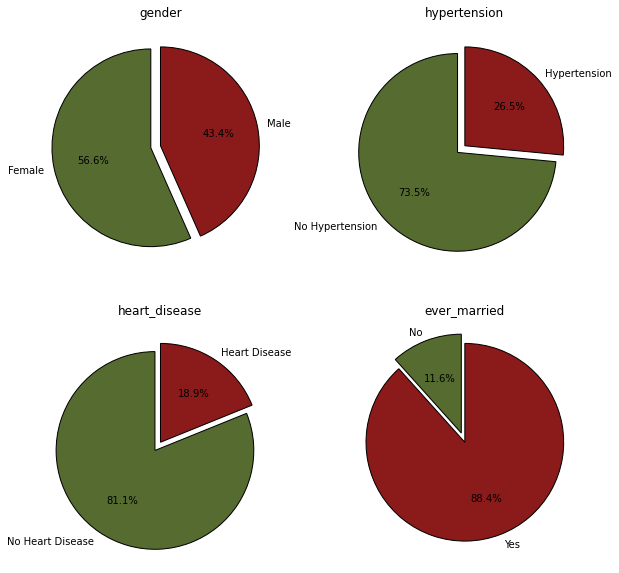

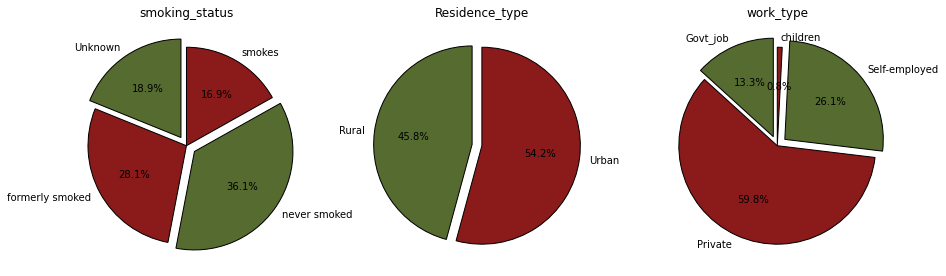

In [167]:
l1 = [gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status]

ax,fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
for i in range(4):
    if len(l1[i]) == 2:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(-1,-4,-1):
    if len(l1[i]) == 2:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i])

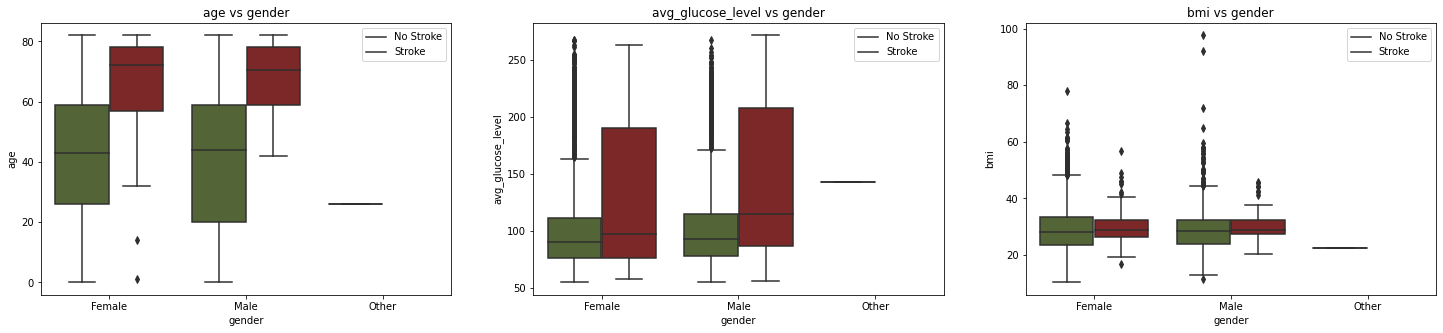

In [168]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'gender',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['gender'][j] for j in sorted(df1['gender'].unique())])
    title = discrete_features[i] + ' vs gender'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

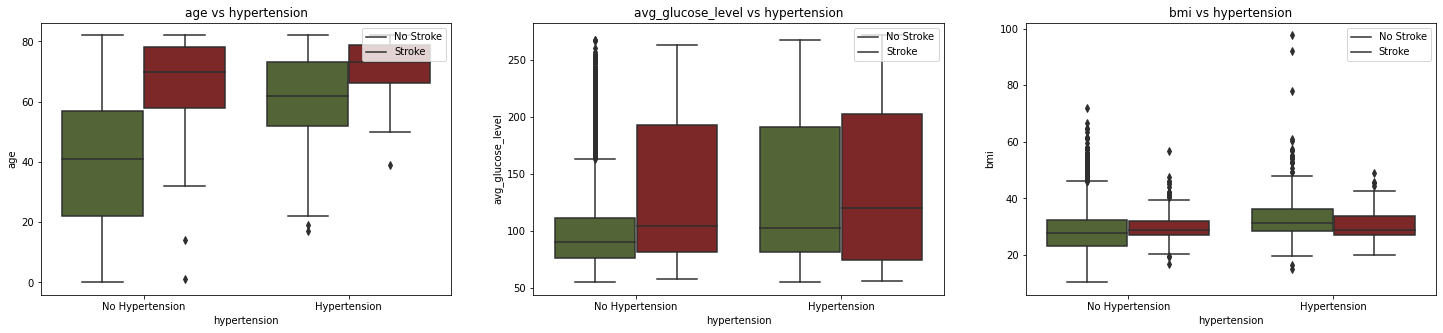

In [169]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'hypertension',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['hypertension'][j] for j in sorted(df1['hypertension'].unique())])
    title = discrete_features[i] + ' vs hypertension'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

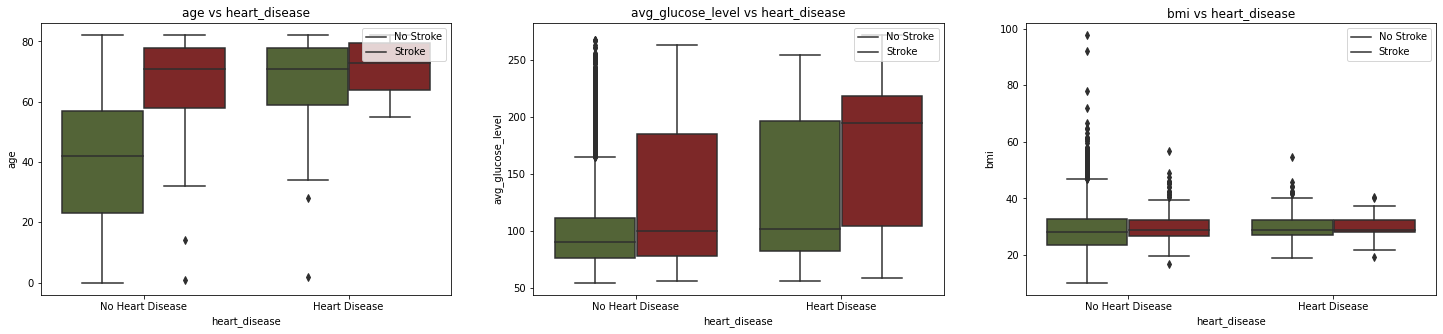

In [170]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'heart_disease',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['heart_disease'][j] for j in sorted(df1['heart_disease'].unique())])
    title = discrete_features[i] + ' vs heart_disease'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

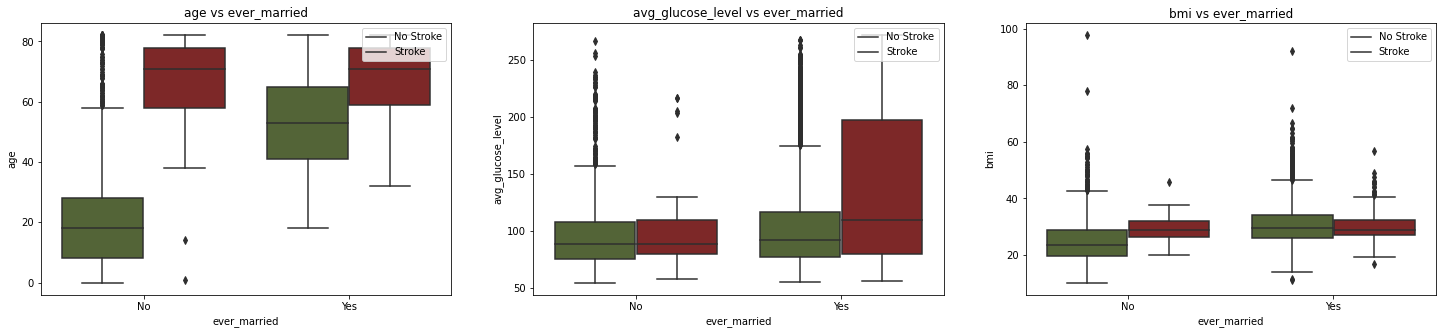

In [171]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'ever_married',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['ever_married'][j] for j in sorted(df1['ever_married'].unique())])
    title = discrete_features[i] + ' vs ever_married'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

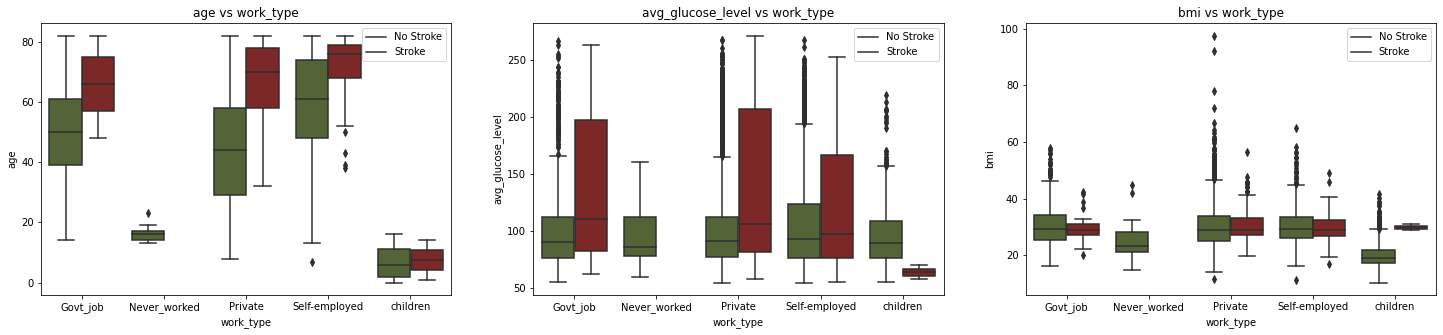

In [172]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'work_type',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['work_type'][j] for j in sorted(df1['work_type'].unique())])
    title = discrete_features[i] + ' vs work_type'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

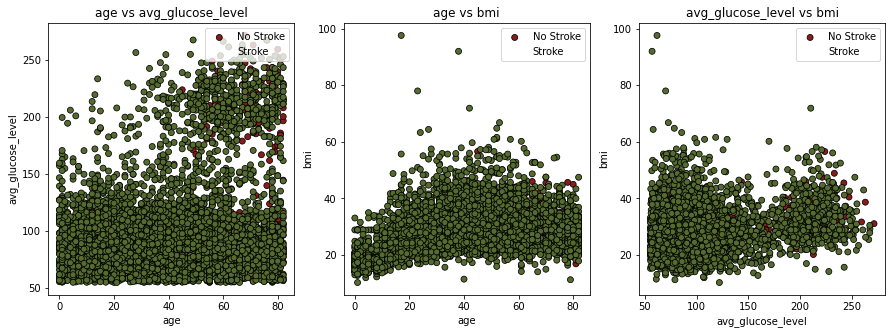

In [173]:
a = 0
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5),squeeze = False)
for i in range(len(discrete_features) - 1):
    for j in range(len(discrete_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(1,3,a)
            sns.scatterplot(x = discrete_features[i],y = discrete_features[j],data = df1,hue = 'stroke',palette = colors,edgecolor = 'black');
            title = discrete_features[i] + ' vs ' + discrete_features[j]
            plt.legend(['No Stroke','Stroke'], loc = 'upper right',)
            plt.title(title)

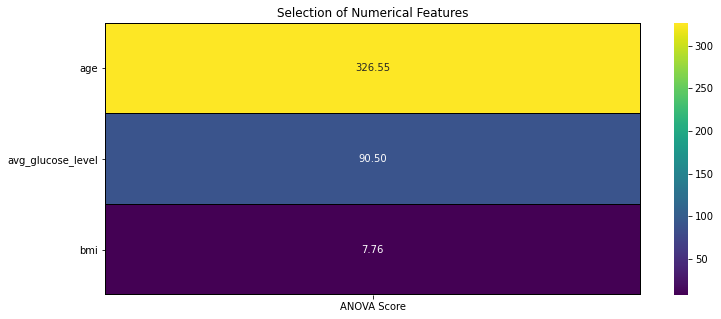

In [178]:

from sklearn.feature_selection import SelectKBest,f_classif

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

features = df1.loc[:, discrete_features]
target = df1.loc[:, 'stroke']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap='viridis', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [177]:
X = df1.drop(columns=['stroke'])
y = df1['stroke']

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Preprocessing pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column Transformer to apply different preprocessing pipelines to different features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Models to try
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Machine (SVM)': SVC(),  
    'Naive Bayes': GaussianNB()
}

# Iterate over models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Append the regression algorithm to the preprocessing pipeline
    regressor = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', model)])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    regressor.fit(X_train, y_train)
    
    # Predict on the testing set
    if 'Regression' not in model_name:
        y_pred = regressor.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\n{model_name} Accuracy:", accuracy)
    else:
        y_pred = regressor.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"\n{model_name} Evaluation:")
        print("Mean Squared Error:", mse)
        print("Mean Absolute Error:", mae)
        print("R-squared Score:", r2)
    print("---------------------------")


Training Linear Regression...

Linear Regression Evaluation:
Mean Squared Error: 0.05200498289131452
Mean Absolute Error: 0.10199356290531576
R-squared Score: 0.08739293430356565
---------------------------
Training Random Forest Regression...

Random Forest Regression Evaluation:
Mean Squared Error: 0.05390929549902152
Mean Absolute Error: 0.08973581213307241
R-squared Score: 0.05397519153225783
---------------------------
Training Gradient Boosting Regression...

Gradient Boosting Regression Evaluation:
Mean Squared Error: 0.05190949247168275
Mean Absolute Error: 0.09149356577918646
R-squared Score: 0.08906864356866429
---------------------------
Training Support Vector Machine (SVM)...

Support Vector Machine (SVM) Accuracy: 0.9393346379647749
---------------------------
Training Naive Bayes...

Naive Bayes Accuracy: 0.8649706457925636
---------------------------


In [182]:
import pandas as pd
from scipy.stats import chi2_contingency
df=pd.read_csv(r"C:\Users\91963\Downloads\healthcare-dataset-stroke-data.csv")
categorical_columns = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]

# Calculate chi-square test for each categorical column
for column in categorical_columns:
    observed = pd.crosstab(df[column], df['stroke'])
    chi2, p, dof, expected = chi2_contingency(observed)
    print(f"Chi-square test result for {column}:")
    print(f"  Chi-square statistic: {chi2}")
    print(f"  p-value: {p}")
    print(f"  Degrees of freedom: {dof}")
    print("")

Chi-square test result for gender:
  Chi-square statistic: 0.47258662884530234
  p-value: 0.7895490538408245
  Degrees of freedom: 2

Chi-square test result for hypertension:
  Chi-square statistic: 81.6053682482931
  p-value: 1.661621901511823e-19
  Degrees of freedom: 1

Chi-square test result for heart_disease:
  Chi-square statistic: 90.25956125843324
  p-value: 2.0887845685229236e-21
  Degrees of freedom: 1

Chi-square test result for ever_married:
  Chi-square statistic: 58.923890259034195
  p-value: 1.6389021142314745e-14
  Degrees of freedom: 1

Chi-square test result for work_type:
  Chi-square statistic: 49.163511976675295
  p-value: 5.397707801896119e-10
  Degrees of freedom: 4

Chi-square test result for Residence_type:
  Chi-square statistic: 1.0816367471627524
  p-value: 0.29833169286876987
  Degrees of freedom: 1

Chi-square test result for smoking_status:
  Chi-square statistic: 29.147269191399264
  p-value: 2.0853997025008455e-06
  Degrees of freedom: 3

